# A page to prepare figures for the geostat class

January 2018 - P. Renard


In [4]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from math import sqrt, pi
from scipy.special import erf, gamma

import geostat as geo

In [ ]:
def pdfBeta(z,a,b):
    f = gamma(a+b) * z**(a-1) * (1-z)**(b-1) / gamma(a) / gamma(b)
    
    return f

In [ ]:
z = np.linspace(0,1,100)
f = pdfBeta(z,3,5)
F = np.cumsum(f)/100
z = z-0.2

fig, ax1 = plt.subplots( figsize=(5, 4))
ax1.plot(z, F)

ax1.set_xlabel('z',fontsize=14)
ax1.set_ylabel('F(z)',fontsize=14)
ax1.legend()
ax1.grid()

plt.savefig('tmp.png')

plt.show()


In [ ]:

zl = np.linspace(0,0.3)
fl = pdfBeta(zl,3,5)
f0 = np.zeros( zl.shape )
zl = zl-0.2

fig, ax1 = plt.subplots( figsize=(5, 4))
ax1.plot(z, f)

ax1.set_xlabel('z',fontsize=14)
ax1.set_ylabel('f(z)',fontsize=14)
ax1.legend()
ax1.grid()
ax1.fill_between(zl, f0 ,fl , facecolor='gray',  alpha=0.4)


plt.savefig('tmp.png')

plt.show()


In [ ]:
def pdfGaussian(z,m,s):
    f = np.exp(-((z-m)/s)**2/2)/s/sqrt(2*pi)
    return f

def cdfGaussian(z,m,s):
    f = (1+erf((z-m)/s/sqrt(2*pi)))/2
    return f

In [ ]:
mu = 4
s = 3

zmin = mu-5*s
zmax = mu+5*s

z = np.linspace(zmin,zmax)

zliml = mu-2*s
zlimr = 2*s+mu

zl = np.linspace(-3*s+mu, zliml)
zr = np.linspace(zlimr,3*s+mu)

f = pdfGaussian(z,mu,s)
f0 = np.zeros( zl.shape )
fl = pdfGaussian(zl,mu,s)
fr = pdfGaussian(zr,mu,s)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(z,f)
ax1.plot([zliml,zliml],[0, 2*pdfGaussian(zliml,mu,s)],'g--')
ax1.plot([zlimr,zlimr],[0, 2*pdfGaussian(zlimr,mu,s)],'g--')
ax1.fill_between(zl,f0 ,fl, facecolor='gray',  alpha=0.4)
ax1.fill_between(zr,f0 ,fr, facecolor='gray',  alpha=0.4)
ax1.set_xlabel('z',fontsize=14)
ax1.set_ylabel('f(z)',fontsize=14)
#ax1.grid()


ax2.plot(z,cdfGaussian(z,mu,s))
ax2.set_xlabel('z',fontsize=14)
ax2.set_ylabel('F(z)',fontsize=14)
#ax2.grid()


plt.savefig('tmp.png')
plt.show()

In [ ]:
z = np.linspace(-5,5,100)
zl = np.linspace(-5,-2)
zr = np.linspace(2,5)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))


ax1.plot(z,pdfGaussian(z,0,1))
ax1.plot([-2,-2],[0,0.1],'g--')
ax1.plot([2,2],[0,0.1],'g--')
ax1.fill_between(zl, np.zeros( zl.shape ),pdfGaussian(zl,0,1), facecolor='gray',  alpha=0.4)
ax1.fill_between(zr, np.zeros( zl.shape ),pdfGaussian(zr,0,1), facecolor='gray',  alpha=0.4)
ax1.set_xlabel('z',fontsize=14)
ax1.set_ylabel('f(z)',fontsize=14)
#ax1.grid()


ax2.plot(z,cdfGaussian(z,0,1))
ax2.set_xlabel('z',fontsize=14)
ax2.set_ylabel('F(z)',fontsize=14)
#ax2.grid()


plt.savefig('gaussianPDf.png')
plt.show()

In [ ]:

z = np.linspace(-7,7,100)

fig, ax1 = plt.subplots( figsize=(5, 4))
ax1.plot(z, pdfGaussian(z,0,1), label=r"$\mu$=0")
ax1.plot(z, pdfGaussian(z,-2,1),'--', label=r"$\mu$=-2")
ax1.plot(z, pdfGaussian(z,2,1),'--', label=r"$\mu$=2")
ax1.set_xlabel('z',fontsize=14)
ax1.set_ylabel('f(z)',fontsize=14)
plt.title(r'$\sigma$=1',fontsize=14)
ax1.legend()
#ax1.grid()

plt.savefig('tmp.png')

plt.show()

In [ ]:

z = np.linspace(-7,7,300)

fig, ax1 = plt.subplots( figsize=(5, 4))
ax1.plot(z, pdfGaussian(z,0,1), label=r"$\sigma$=1")
ax1.plot(z, pdfGaussian(z,0,1/3),'--', label=r"$\sigma$=1/3")
ax1.plot(z, pdfGaussian(z,0,3),'--', label=r"$\sigma$=3")
ax1.set_xlabel('z',fontsize=14)
ax1.set_ylabel('f(z)',fontsize=14)
plt.title(r'$\mu$=0',fontsize=14)
ax1.legend()
#ax1.grid()

plt.savefig('tmp.png')

plt.show()

In [ ]:
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [ ]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
sx = 1.2
sy = 1.2
rho = -0.7
cxy = rho * sx *sy
Sigma = np.array([[ sx**2. , cxy], [cxy,  sy**2] ])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure( figsize=(12,12) )
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.3, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.35,0.1)
ax.set_zticks(np.linspace(0,0.1,2))
ax.view_init(40, 70)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
#ax.set_title('f(x,y)',fontsize=20)

plt.savefig('tmp.png')

plt.show()

C:\Users\gehrenard\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


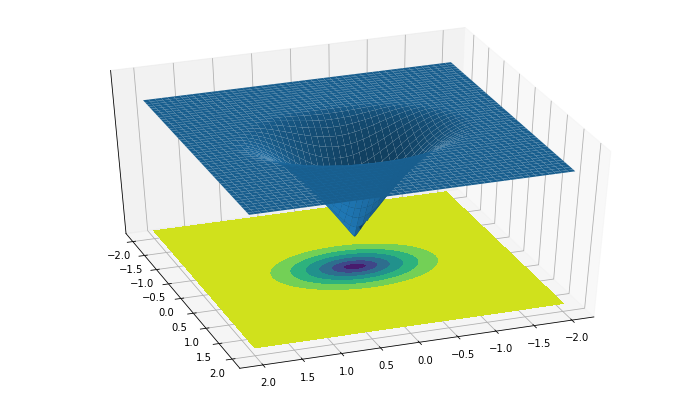

In [60]:
# Plot a perspective view of an isotropic and anisotropic variogram

N = 300
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)
R = np.sqrt((Y*1.5)**2+(X)**2) # Isotropic
R = np.sqrt((Y*1.5)**2+(X)**2) # Anisotropic

variomod = geo.Variogram( 1.5, 1, typ='spherical' , nugget=0)
C = variomod(R)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure( figsize=(12,7) )
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, C)

cset = ax.contourf(X, Y, C, zdir='z', offset=-0.3, cmap=cm.viridis)

# Adjust the limits, and view angle
ax.set_zlim(-0.35,1.2)
ax.view_init(40, 70)

plt.savefig('tmp.png')

plt.show()

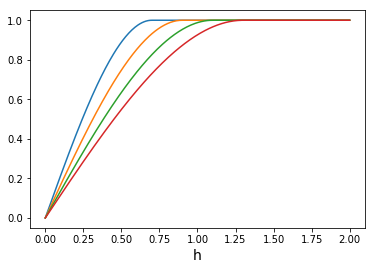

In [70]:
X = np.linspace(0, 2, N)

for i in [0.7,0.9,1.1,1.3 ]:
    variomod = geo.Variogram( i, 1, typ='spherical' )
    C = variomod(X)
    plt.plot(X, C)
    
plt.xlabel('h',fontsize=14)
plt.savefig('tmp.png')
plt.show()

In [ ]:
# Mean vector and covariance matrix
mu = np.array([0., 0.])
sx = 1.2
sy = 1.2
rho = 0.99
cxy = rho * sx *sy
Sigma = np.array([[ sx**2. , cxy], [cxy,  sy**2] ])

n=10000

pos=np.zeros(shape=(1,1,2))
x=np.random.uniform(-3,3,n)
y=np.random.uniform(-3,3,n)
r= np.corrcoef(x,y) 

for i in range(n):
    pos[0,0,0] = x[i]
    pos[0,0,1] = y[i]
    p=multivariate_gaussian(pos, mu, Sigma)
    u=np.random.uniform(0,1,1)
    if( u>p ):
        x[i] = np.nan
        y[i] = np.nan
        
x = x[np.isfinite(x)]
y = y[np.isfinite(y)]
        
r = np.corrcoef(x,y) 
print('Linear correlation coefficient:',r[1,0])

fig = plt.figure( figsize=(6,6) )
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.grid()

plt.savefig('tmp.png')
plt.show()

In [ ]:

y = x*(x-2)*(x+2)

r = np.corrcoef(x,y) 
print('Linear correlation coefficient:',r[1,0])

fig = plt.figure( figsize=(6,6) )
plt.plot(x,y,'o')

plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.grid()

plt.savefig('tmp.png')
plt.show()